<a href="https://colab.research.google.com/github/vanshikagoyal6396/MLCOE_TASK_/blob/main/ClassificationTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***IMPORTING LIBRARIES***

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***INPUT DATA***

In [100]:
df=pd.read_csv('/content/Raw_Data_Singapore Credit Dataset.csv')

In [101]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [102]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [103]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [104]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [105]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

no null values

In [106]:

df.shape

(1000, 17)

In [107]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


***DATA ANALYSIS AND CLEANING OF DATA***

In [108]:
v1=df['purpose'].value_counts()
v1

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

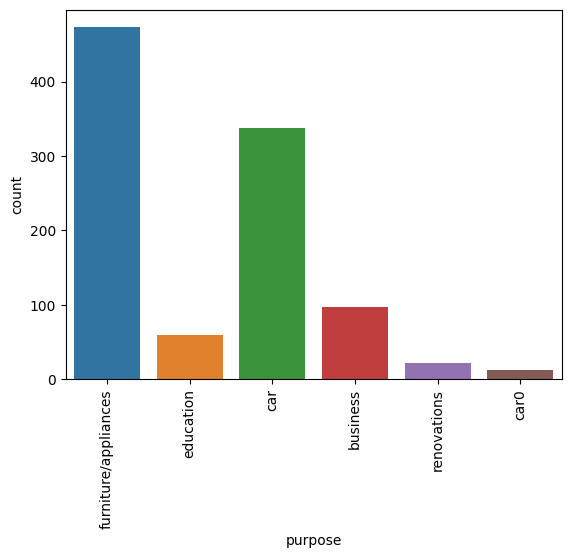

In [109]:
sns.countplot(x='purpose',data=df)
plt.xticks(rotation=90)
plt.show()



In [110]:
v2=df['credit_history'].value_counts()
v2

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

In [111]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [112]:
labels=v2.index
sizes=v2.values

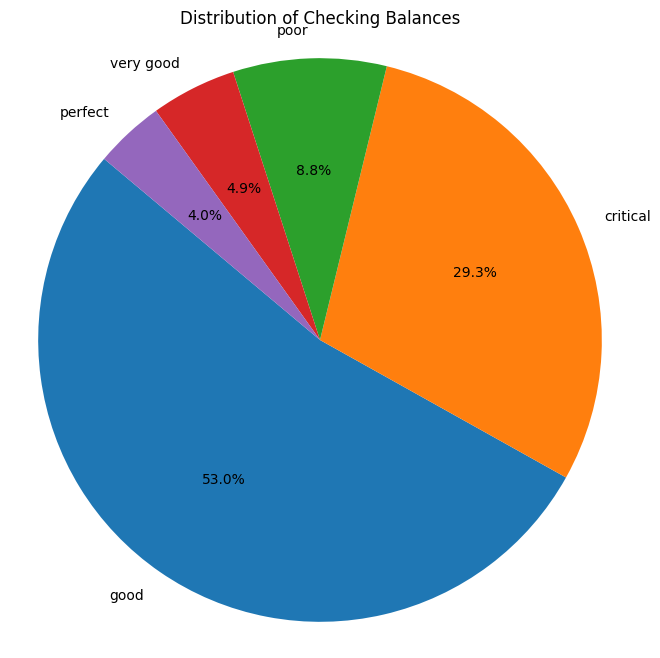

In [113]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Checking Balances')
plt.show()


In [114]:
#checking the balance
df['checking_balance'].value_counts()


unknown        394
< 0 SGD        274
1 - 200 SGD    269
> 200 SGD       63
Name: checking_balance, dtype: int64

In [115]:
ct1 = pd.crosstab(df['checking_balance'], df['credit_history'],normalize='index')
ct1*100

credit_history,critical,good,perfect,poor,very good
checking_balance,,,,,
1 - 200 SGD,20.446097,54.275093,6.691450,13.011152,5.576208
< 0 SGD,24.452555,58.394161,4.744526,4.379562,8.029197
> 200 SGD,28.571429,58.730159,3.174603,4.761905,4.761905
unknown,38.832487,47.461929,1.776650,9.644670,2.284264


In [116]:
#REPLACING THE CATEGORICAL DATA INTO NUMERICAL DATA FOR BETTER ANALYSIS
df['credit_history'].replace({'critical':-1,'good':1,'poor':0,'perfect':3,'very good':2},inplace=True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,-1,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,1,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,-1,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,1,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,0,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [117]:
v2=df['employment_duration'].value_counts()

<Axes: xlabel='employment_duration', ylabel='count'>

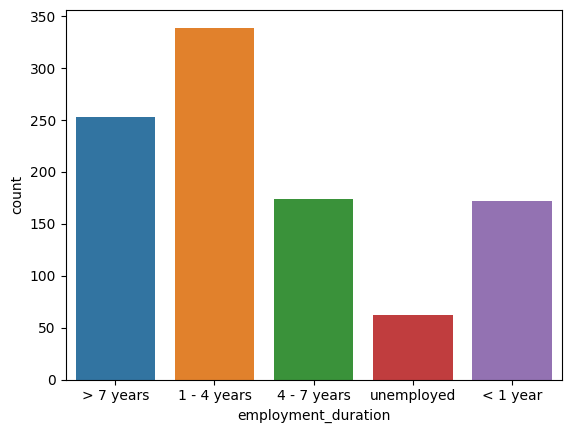

In [118]:
sns.countplot(x='employment_duration',data=df)


In [119]:
df['employment_duration'].replace({'unemployed':0,'< 1 year':1,'1 - 4 years':2,'4 - 7 years':3,'> 7 years':4,},inplace=True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,-1,furniture/appliances,1169,unknown,4,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,1,furniture/appliances,5951,< 100 SGD,2,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,-1,education,2096,< 100 SGD,3,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,1,furniture/appliances,7882,< 100 SGD,3,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,0,car,4870,< 100 SGD,2,3,4,53,none,other,2,skilled,2,no,yes


In [120]:
df['months_loan_duration'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: months_loan_duration, dtype: int64

<Axes: xlabel='months_loan_duration'>

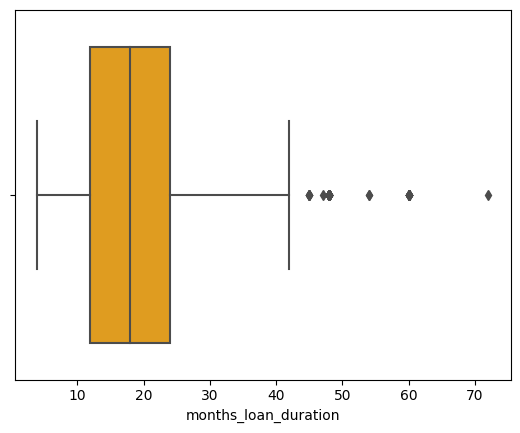

In [121]:
sns.boxplot(x = 'months_loan_duration', data = df,color='orange')

In [122]:
g1 = df.groupby('default')['months_loan_duration'].mean().reset_index()
g1

,default,months_loan_duration
0,no,19.207143
1,yes,24.860000


average of 24 months loans

In [123]:
df['savings_balance'].value_counts()

< 100 SGD         603
unknown           183
100 - 500 SGD     103
500 - 1000 SGD     63
> 1000 SGD         48
Name: savings_balance, dtype: int64

In [124]:
#replacing the data of saving_balance column according to our need
df['savings_balance'].replace({'unknown':0,'< 100 SGD':1,'100 - 500 SGD':2,'500 - 1000 SGD':3,'> 1000 SGD':4},inplace=True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,-1,furniture/appliances,1169,0,4,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,1,furniture/appliances,5951,1,2,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,-1,education,2096,1,3,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,1,furniture/appliances,7882,1,3,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,0,car,4870,1,2,3,4,53,none,other,2,skilled,2,no,yes


In [125]:
v3=df['other_credit'].value_counts()
v3

none     814
bank     139
store     47
Name: other_credit, dtype: int64

In [126]:
labels=v3.index
sizes=v3.values

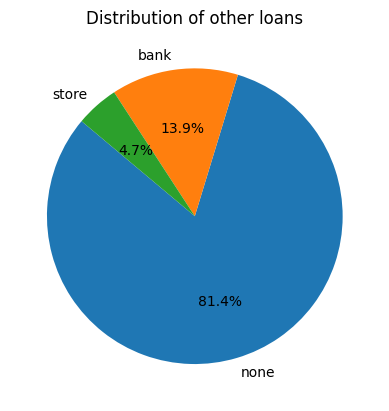

In [127]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of other loans')
plt.show()


81 % people don't have any loan other than this credit card loan

replacing data of other_credit column

In [128]:
df['other_credit'].replace({'none':0,'bank':1,'store':2},inplace=True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,-1,furniture/appliances,1169,0,4,4,4,67,0,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,1,furniture/appliances,5951,1,2,2,2,22,0,own,1,skilled,1,no,yes
2,unknown,12,-1,education,2096,1,3,2,3,49,0,own,1,unskilled,2,no,no
3,< 0 SGD,42,1,furniture/appliances,7882,1,3,2,4,45,0,other,1,skilled,2,no,no
4,< 0 SGD,24,0,car,4870,1,2,3,4,53,0,other,2,skilled,2,no,yes


In [129]:
df['percent_of_income'].value_counts()

4    476
2    231
3    157
1    136
Name: percent_of_income, dtype: int64

In [130]:
v4=df['housing'].value_counts()
v4

own      713
rent     179
other    108
Name: housing, dtype: int64

In [131]:
labels=v4.index
sizes=v4.values

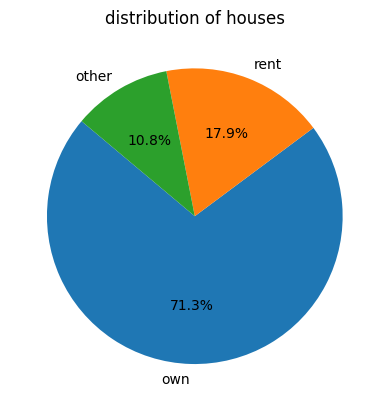

In [132]:
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=140)
plt.title("distribution of houses")
plt.show()


In [133]:
df['housing'].replace({'own':0,'other':1,'rent':2},inplace=True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,-1,furniture/appliances,1169,0,4,4,4,67,0,0,2,skilled,1,yes,no
1,1 - 200 SGD,48,1,furniture/appliances,5951,1,2,2,2,22,0,0,1,skilled,1,no,yes
2,unknown,12,-1,education,2096,1,3,2,3,49,0,0,1,unskilled,2,no,no
3,< 0 SGD,42,1,furniture/appliances,7882,1,3,2,4,45,0,1,1,skilled,2,no,no
4,< 0 SGD,24,0,car,4870,1,2,3,4,53,0,1,2,skilled,2,no,yes


In [134]:
v5=df['job'].value_counts()
v5

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64

In [135]:
x=v5.index
y=v5.values

<Axes: xlabel='job', ylabel='count'>

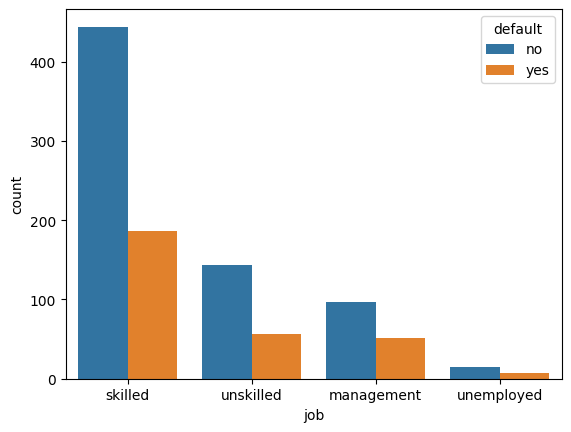

In [136]:
sns.countplot(x='job',hue='default',data=df)

In [137]:
df['job'].replace({'skilled':1,'unskilled':-1,'management':2,'unemployed':0},inplace=True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,-1,furniture/appliances,1169,0,4,4,4,67,0,0,2,1,1,yes,no
1,1 - 200 SGD,48,1,furniture/appliances,5951,1,2,2,2,22,0,0,1,1,1,no,yes
2,unknown,12,-1,education,2096,1,3,2,3,49,0,0,1,-1,2,no,no
3,< 0 SGD,42,1,furniture/appliances,7882,1,3,2,4,45,0,1,1,1,2,no,no
4,< 0 SGD,24,0,car,4870,1,2,3,4,53,0,1,2,1,2,no,yes


In [138]:
df['phone'].value_counts()

no     596
yes    404
Name: phone, dtype: int64

Text(0.5, 1.0, 'distribution of phone column')

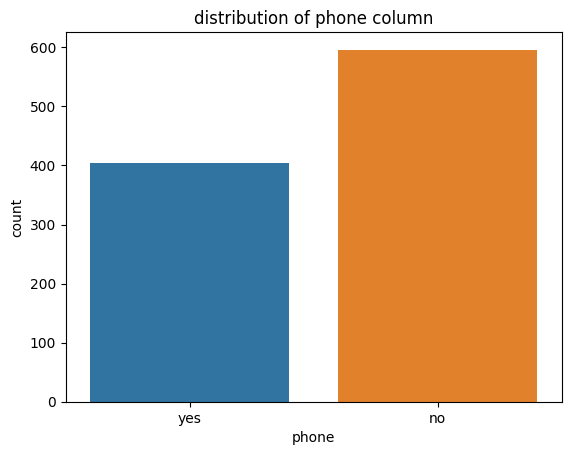

In [140]:
sns.countplot(x='phone',data=df)
plt.title("distribution of phone column")

In [141]:
df['phone'].replace({'yes':1,'no':0},inplace=True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,-1,furniture/appliances,1169,0,4,4,4,67,0,0,2,1,1,1,no
1,1 - 200 SGD,48,1,furniture/appliances,5951,1,2,2,2,22,0,0,1,1,1,0,yes
2,unknown,12,-1,education,2096,1,3,2,3,49,0,0,1,-1,2,0,no
3,< 0 SGD,42,1,furniture/appliances,7882,1,3,2,4,45,0,1,1,1,2,0,no
4,< 0 SGD,24,0,car,4870,1,2,3,4,53,0,1,2,1,2,0,yes
